In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from helpfulfun import *
%load_ext autoreload
%autoreload 2


In [2]:
# READ csv data
train_path = 'train.csv'
test_path = 'test.csv'
train_df = pd.read_csv(train_path, index_col=0)
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [3]:
train_df.loc[train_df["Prediction"] == "s", "Prediction"] = 1
train_df.loc[train_df["Prediction"] == "b", "Prediction"] = 0

In [4]:
train_y = train_df["Prediction"]
train_x = train_df.drop("Prediction", axis=1)
x = train_x.to_numpy()
y = train_y.to_numpy()
print("x: ", x.shape, " y: ", y.shape)

x:  (250000, 30)  y:  (250000,)


In [5]:
train_df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [6]:
train_df = train_df.replace(-999.000000, np.NaN )
train_x = train_df.drop("Prediction", axis=1)
x = x = train_x.to_numpy()
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,0,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
100002,0,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
100003,0,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
100004,0,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [7]:
train_df.isnull().sum()

Prediction                          0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [10]:
x_der = x[:,:13]
x_der.shape

(250000, 13)

In [11]:
train_x_nomiss = train_df.drop(["Prediction", "DER_mass_MMC", "DER_deltaeta_jet_jet",
                                   "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", 
                                   "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi",
                                   "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi"], 
                               axis=1)
x_nomiss = train_x_nomiss.to_numpy()

x_nomiss.shape

(250000, 19)

In [12]:
x_der_nomiss = x_nomiss[:, :8]
np.savetxt("x_der_nomiss.csv", x_der_nomiss, delimiter = ",")
x_der_nomiss.shape

(250000, 8)

In [13]:
# Omitting missings implicitly assumes that measurements are independent of missingness 
# (or results can only be generalised to population that’d be non-missing if asked).
# Standard assumption: Missing completely at random (MCAR) Whether an observation is
# missing is independent of its value.
# Otherwise: Missing at random (MAR) Whether an observation is missing only
# depends on observed values, not on the missing ones.
# Example: More people can be expected positive for a virus out of those tested, 
# because more people who are tested have symptoms, but testing may be independent of positivity
# conditionally on symptoms.
# Missing not at random (MNAR) Missingness can depend on the
# missing value, i.e., distribution of true values is genuinely
# different between missings and non-missings.

# Problems:
# Based on data alone cannot tell apart MCAR, MAR and MNAR, because would need to know true values of missings.
# Chances are MNAR holds in most real situations, but statistics can normally only do something about MCAR and MAR

# Always ask: What do we know about reasons for missingness in the specific situation? This can often have an 
# impact on analysis.

# Methods to deal with missing values:
#1. Removing variables if they have many missings and appear unreliable.
#2. Treat “missing” as another category for categorical variables; good if it really can mean something else
#3. Imputation: Replace missing values by “plausible” values.

# Different types of imputation:
# Mean imputation: 
# replace missoing by mean of non-missing on same variable
# Advantage: no influence on mean coimputation.
# Disadvantages: will underestimate variance, can destroy multivariate dependence patterns

#Similar to median imputation and mode imputation. Use mean when data distribution is symmetric. If skewed prefer median. 

#Regression imputation:
#estimate missing value by regression on non-missing variables. Could 
# use variables that have missing values themselves, but then need to decide what to do with missing there.
# Advantage: effective use of non-missing info (MAR)
# Issues: Regression model appropriate?

#knn imputation
#impute missin values by average or median or mode value of k (eg k=3) nearest neighbours on non-missing 
# variables according to distance measure (eg euclidean)
#Advantage: effective use of non-missing info (mar), doesn't need parametric assumptions such as linearity


#Multiple imputation:
# produce several datasets with diferent random imputations of missings.
# can run analyses on all of them, compare and analyse variation, and run pooled aggregate analysis,
# taking into account variation from imputation.
# Popular one: MICE

In [ ]:
# dataset without col with #missing >30%  and inferring the others

In [14]:
train_x_nomiss30 = train_df.drop(["Prediction", "DER_deltaeta_jet_jet",
                                   "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", 
                                   "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi",
                                   "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi"], 
                               axis=1)
x_nomiss30 = train_x_nomiss30.to_numpy()
x_nomiss30.shape
# we need to infer DER_mass_MMC

(250000, 20)

In [15]:
train_x_nomiss30.isnull().sum()

DER_mass_MMC                   38114
DER_mass_transverse_met_lep        0
DER_mass_vis                       0
DER_pt_h                           0
DER_deltar_tau_lep                 0
DER_pt_tot                         0
DER_sum_pt                         0
DER_pt_ratio_lep_tau               0
DER_met_phi_centrality             0
PRI_tau_pt                         0
PRI_tau_eta                        0
PRI_tau_phi                        0
PRI_lep_pt                         0
PRI_lep_eta                        0
PRI_lep_phi                        0
PRI_met                            0
PRI_met_phi                        0
PRI_met_sumet                      0
PRI_jet_num                        0
PRI_jet_all_pt                     0
dtype: int64

In [16]:
## Let's find the best measure of the central tendency of data 

/Users/ernestobocini/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DER_mass_MMC'>

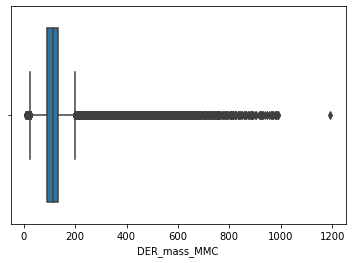

In [17]:
sns.boxplot(train_x_nomiss30.DER_mass_MMC)

/Users/ernestobocini/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DER_mass_MMC', ylabel='Density'>

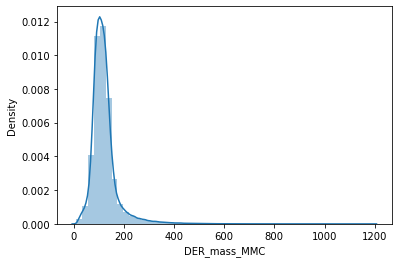

In [18]:
sns.distplot(train_x_nomiss30.DER_mass_MMC)

In [19]:
#Here is what the box plot would look like. You may note that the data is skewed. There are several or large numbers 
#of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, 
#in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for 
#replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, 
#one can use the mean value for imputing missing values.
#Let's use median!

In [20]:
train_x_nomiss30_median = train_x_nomiss30.fillna(train_x_nomiss30.median())
train_x_nomiss30_median.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_all_pt                 0
dtype: int64

In [21]:
x_nomiss30_median = train_x_nomiss30_median.to_numpy()
x_nomiss30_median.shape

(250000, 20)

In [22]:
# same but without pri data:

In [23]:
x_dre_nomiss30_median = x_nomiss30_median[:,:9]
x_dre_nomiss30_median.shape

(250000, 9)

In [24]:
# Imputation usin KNN:

In [25]:
from sklearn.impute import KNNImputer

In [26]:
knnimp = KNNImputer(n_neighbors= 3)

In [ ]:
knnimp.fit_transform(x_nomiss30[:,:9])